In [45]:
import cv2 as cv
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Assignment 2: Pixel Processing, Color Spaces, Convolution

In this assignment, we were tasked with learning how to process and manipulate pixels of images to change brightness and contrast, and filter the images to blur/sharpen. To do this, we 

In [46]:
# Read the first three images
img1 = cv.imread("book.jpg")
img2 = cv.imread("pumpkin.jpg")
img3 = cv.imread("red_chair.jpg")

##### Pixel Processing
Change Brightness: Subtract from each pixel to decrease brightness or add to each pixel to increase brightness

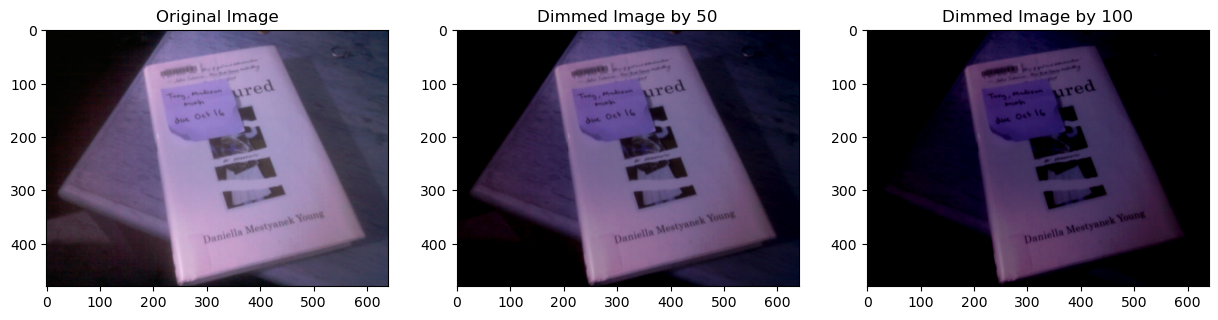

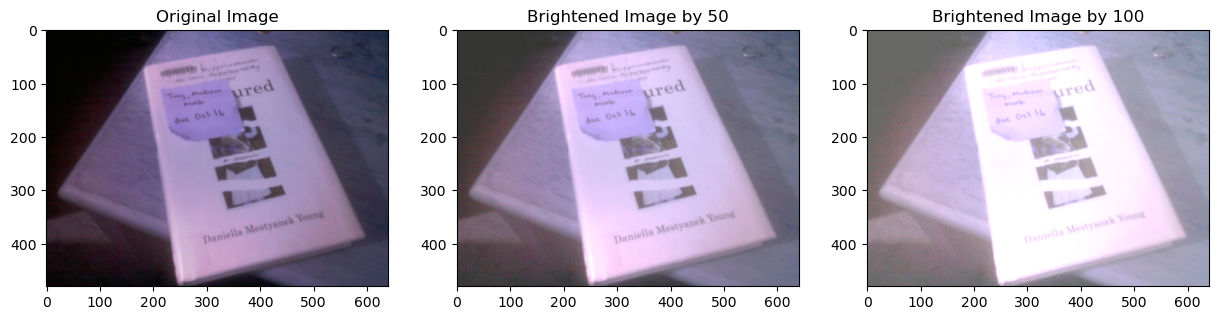

In [47]:
def change_brightness(img, change_type):
    '''
    Plots an original image, as well as two levels of brightness change.
    Args:
        img: An image as read in by the python opencv package.
        change_type: A string representing the type of brightness change: increase or decreased brightness.
    '''
    # establish brightness values and subplots 
    brightness_values = [50,100]
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[15,15])
    fig_num = [ax2, ax3]

    # plot the original image 
    ax1.imshow(img)

    # loop through the brightness range
    for i in range(len(brightness_values)):
        if change_type == 'increase':
            changed_image = img + brightness_values[i]
            changed_image[changed_image < img] = 255
        elif change_type == 'decrease':
            changed_image = img - brightness_values[i]
            changed_image[changed_image > img] = 0

        fig_num[i].imshow(changed_image)

    ax1.title.set_text('Original Image')    
    if change_type == 'increase':
        ax2.title.set_text('Brightened Image by 50')
        ax3.title.set_text('Brightened Image by 100')
    elif change_type == 'decrease':
        ax2.title.set_text('Dimmed Image by 50')
        ax3.title.set_text('Dimmed Image by 100')

change_brightness(img1, "decrease")
change_brightness(img1, "increase")
change_brightness(img2, 'increase')


Change contrast: Change contrast of image by multiplying or dividing by a factor 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


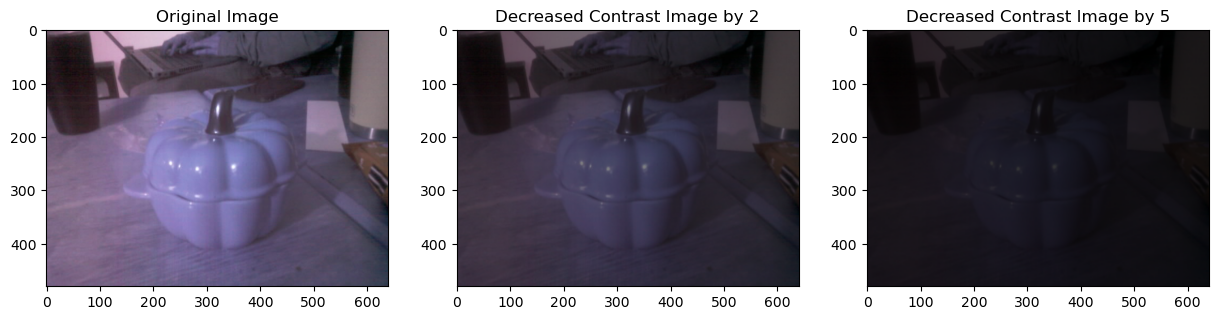

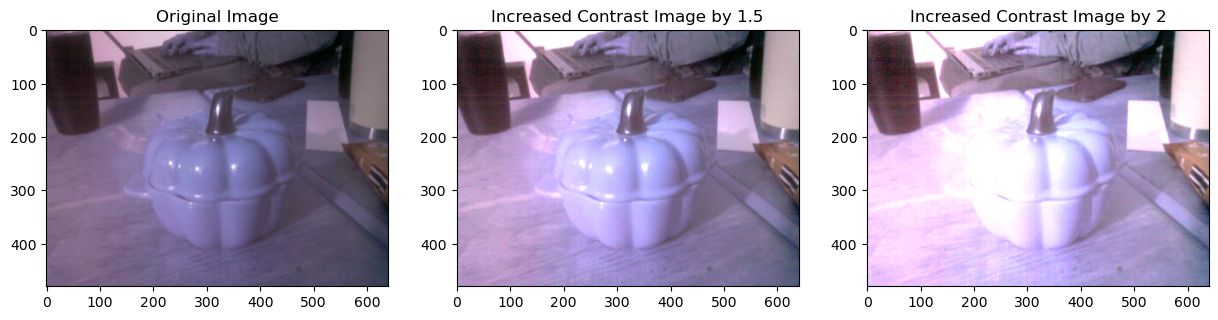

In [48]:
def change_contrast(img, change_type):
    ''''''
    contrast_values = [2,5]
    # if change_type == 'decrease':
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[15,15])
    fig_num = [ax2, ax3]

    # plot the original image 
    ax1.imshow(img)

    for i in range(len(contrast_values)):
        if change_type == 'increase':
            contrast_values = [1.5, 2]
            img_change = (img*contrast_values[i]).astype(np.int32)
            img_change[img_change < img] = 255

        if change_type == 'decrease':
            img_change = img // contrast_values[i]
            img_change[img_change > img] = 0
        
        fig_num[i].imshow(img_change)

    ax1.title.set_text('Original Image')    
    if change_type == 'increase':
        ax2.title.set_text('Increased Contrast Image by 1.5')
        ax3.title.set_text('Increased Contrast Image by 2')
    elif change_type == 'decrease':
        ax2.title.set_text('Decreased Contrast Image by 2')
        ax3.title.set_text('Decreased Contrast Image by 5')
    
change_contrast(img1, 'decrease')
change_contrast(img1, 'increase')
change_contrast(img2, 'decrease')
change_contrast(img2, 'increase')


Change brightness alternating: change brightness of alternating pixels

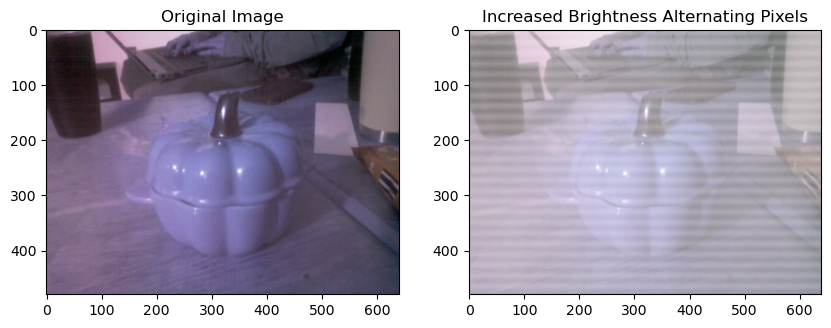

In [49]:
def alternating_brightness_change(img, change_type):
    '''
    Plots a figure containing the original image given and a version of the image with the
    alternating pixels brightened or dimmed, depending on the change sepcified.
    Args:
        img: An image read in using opencv python package. 
        change_type: A string representing the type of change to brightness to apply.
    '''
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,10])

    ax1.imshow(img)
    ax1.title.set_text('Original Image')
    img_change = np.copy(img)

    if change_type == 'increase':
        img_change[::2] = 255
        ax2.title.set_text('Increased Brightness Alternating Pixels')
    elif change_type == 'decrease':
        img_change[::2] = 0
        ax2.title.set_text('Decreased Brightness Alternating Pixels')

    ax2.imshow(img_change)

alternating_brightness_change(img1, 'increase')
alternating_brightness_change(img1, 'decrease') 
alternating_brightness_change(img2, 'increase')
alternating_brightness_change(img2, 'decrease')

##### Color Spaces

Separate the R, G, and B channels. Then, plot each channel with their respective histograms. 

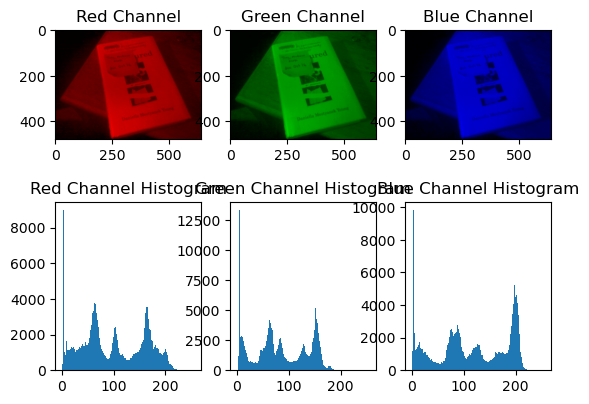

In [50]:
def plot_histogram(data, colorscale, plt):
    '''
    Plots a histogram of an image given an array of integers representing the pixel
    color, and the max value of the colorgrade scale.

    Args:
        data: An array of integers representing each pixel's color value in the photo.
        colorscale: An integer representing the max value of the color scale.
    '''
    return plt.hist(data, colorscale, [0, colorscale])

def change_color_rgb(img):
    '''
    Splits a given image into RBG channels and plots the resulting images and corresponding histograms.
    '''
    (r, g, b) = cv.split(img)
    zeros = np.zeros(img.shape[:2], dtype=b.dtype)

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)


    ax1.imshow(cv.merge([r, zeros, zeros]))
    plot_histogram(r.ravel(), 256, ax4)
    ax2.imshow(cv.merge([zeros, g, zeros]))
    plot_histogram(g.ravel(), 256, ax5)
    ax3.imshow(cv.merge([zeros, zeros, b]))
    plot_histogram(b.ravel(), 256, ax6)

    ax1.title.set_text('Red Channel')
    ax2.title.set_text('Green Channel')
    ax3.title.set_text('Blue Channel')
    ax4.title.set_text('Red Channel Histogram')
    ax5.title.set_text('Green Channel Histogram')
    ax6.title.set_text('Blue Channel Histogram')

change_color_rgb(img1)

Separate the hue, saturation, and value channels. Then, plot each channel with their respective histograms.

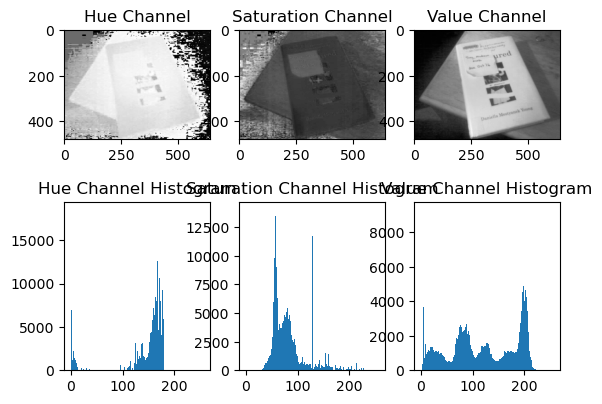

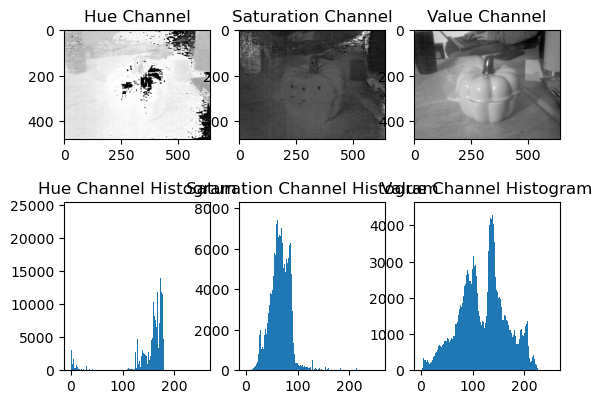

In [51]:
def change_color_hsv(img):
    '''
    Splits a given image into the hue/saturation/value color space and
    plots the corresponding changed image and histograms.
    '''
    (h, s, v) = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
    ax1.imshow(h, "gray")
    plot_histogram(h.ravel(), 256, ax4)
    ax2.imshow(s, "gray")
    plot_histogram(s.ravel(), 256, ax5)
    ax3.imshow(v, "gray")
    plot_histogram(v.ravel(), 256, ax6)

    ax1.title.set_text('Hue Channel')
    ax2.title.set_text('Saturation Channel')
    ax3.title.set_text('Value Channel')
    ax4.title.set_text('Hue Channel Histogram')
    ax5.title.set_text('Saturation Channel Histogram')
    ax6.title.set_text('Value Channel Histogram')

change_color_hsv(img1)
change_color_hsv(img2)


Hue, saturation, and value are factors that represent the concept of lighting. 

Hue describes the pure color. For the book, the hue image clearly distinguishes the book, table and background from each other. This is also reflected in the plot where there are three different maximums, suggesting that there are three main hues. For the pumpkin, the image is mostly the same color with little to no distinguishable features. The histogram has one main maximum, demonstrating that there is one main hue in the picture.

Saturation refers to the intensity of a color. The saturation plots for both images suggest that there is a considerable amount of gray pigment, contributing to the low saturation. 

Value describes the lightness or darkness of a color. For the book, the value is distributed pretty evenly, with maxiumums at either end. The maximum at the low-value end conveys the dark background in the image, while the maximum at the high-value end represents the lightness of the book and even some of the table. For the pumpkin, there are two maximums at around the mid-value region, so the image is neither particiulary light or dark. The pumpkin is highlighted quite well, so its lightness could be reflected in the high values of the histogram. 

##### Convolution / Filtering

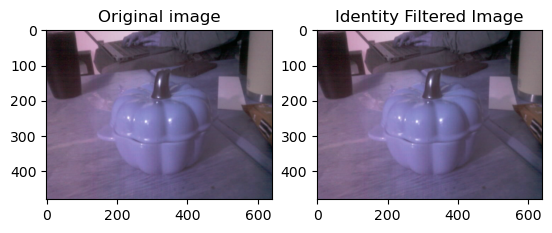

In [52]:
def identity_filter(img):
    '''
    Applies an identity filter onto a given image and plots them.
    '''
    fig, (ax1, ax2) = plt.subplots(1,2)

    ax1.imshow(img)

    filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
    identity_img = cv.filter2D(src=img, ddepth=-1, kernel=filter)
    ax2.imshow(identity_img)

    ax1.title.set_text('Original image')
    ax2.title.set_text('Identity Filtered Image')

identity_filter(img1)
identity_filter(img2)

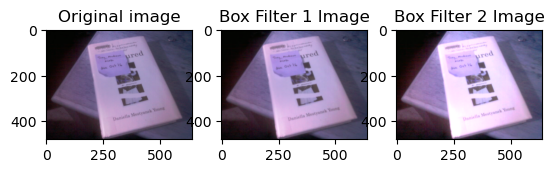

In [53]:
def box_filter(img):
    '''
    Applies two versions of a box filter onto the given image and plots them.
    '''
    filter1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) * 1/8
    filter2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) * 1/6
    # filter2 = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
    box_img1 = cv.filter2D(src=img, ddepth=-1, kernel=filter1)
    box_img2 = cv.filter2D(src=img, ddepth=-1, kernel=filter2)


    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.imshow(img)
    ax2.imshow(box_img1)
    ax3.imshow(box_img2)

    ax1.title.set_text('Original image')
    ax2.title.set_text('Box Filter 1 Image')
    ax3.title.set_text('Box Filter 2 Image')

box_filter(img1)
box_filter(img2)

The box filter is a form of a low-pass filter that equally weights all samples within a square region of the image. 

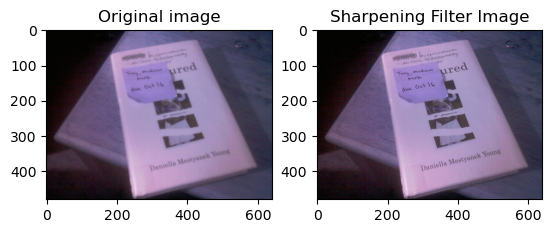

In [54]:
def sharpening_filter(img):
    """
    Applies a sharpening filter onto a given image and plots them.
    """
    filter1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharp_img1 = cv.filter2D(src=img, ddepth=-1, kernel=filter1)

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(img)
    ax2.imshow(sharp_img1)
    
    ax1.title.set_text('Original image')
    ax2.title.set_text('Sharpening Filter Image')

sharpening_filter(img1)
sharpening_filter(img2)

Sharpening filters enhances the contrast between neighboring pixels, making details and edges more defined. The words in the image of the book are more legible after the filter is applied. In the image of the pumpkin, the pumpkin more defined and the person with the laptop in the background is clearer too.

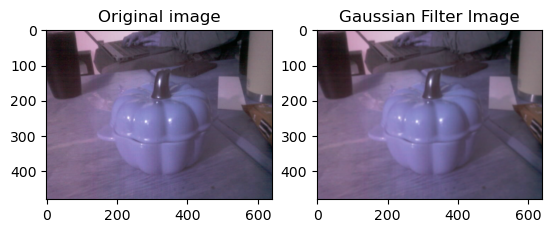

In [55]:
def gaussian_filter(img):
    '''
    Applies a gaussian blur onto a given image and plots them.
    '''
    filter = np.array([[-1, -1, -1], [-1, 10, -1], [-1, -1, -1]])
    new_img = cv.GaussianBlur(img, (5, 5), 0)

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(img)
    ax2.imshow(new_img)
    
    ax1.title.set_text('Original image')
    ax2.title.set_text('Gaussian Filter Image')

gaussian_filter(img1)
gaussian_filter(img2)

The Gaussian Filter is a type of low-pass filter that blurs the image, reducing the amount of noise and detail. This is particularly noticable in the image of the book, where the words become more blurry when the filter is applied. The pumpkin image also loses some of its original definition.